# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [430]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline
pl.style.use('ggplot')
import scipy
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels as sm

Populating the interactive namespace from numpy and matplotlib


In [208]:
ms = pd.read_csv('World firearms murders and ownership - Sheet 1.csv')
gun = pd.read_csv('gun.csv')
pop = pd.read_csv('pop.csv')
gdp = pd.read_csv('gdp.csv')

In [209]:
gdp = gdp[['Country Name','2012']]

In [210]:
ms = ms[['Country/Territory','Average total all civilian firearms','Number of homicides by firearm']].rename(columns={'Country/Territory':'Country Name'})

In [211]:
gun = gun.rename(columns={'Country':'Country Name'})

In [212]:
pop = pop[['Country Name','2012']]

In [213]:
ms = ms.merge(pop,on='Country Name').merge(gdp,on='Country Name').merge(gun,on='Country Name')

In [214]:
ms = ms.rename(columns = {'2012_x':'pop','2012_y':'gdp'})

In [215]:
df_ = ms
df_.head()

,Country Name,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,Guns/100 inhabitants,Number of mass shootings
0,Australia,3050000.0,30.0,22728254.0,1.538190e+12,15.0,4
1,Austria,2500000.0,18.0,8429991.0,4.074520e+11,30.4,1
2,Canada,9950000.0,173.0,34750545.0,1.824290e+12,30.8,4
3,Denmark,650000.0,15.0,5591572.0,3.271490e+11,12.0,0
4,Finland,2400000.0,24.0,5413971.0,2.567060e+11,45.3,2


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


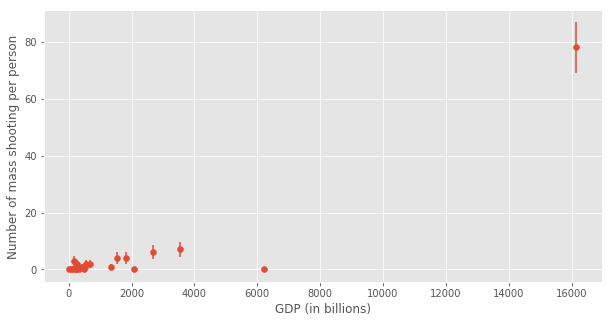

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [216]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


## Figure 1. mass shooting vs gdp in absolute numbers

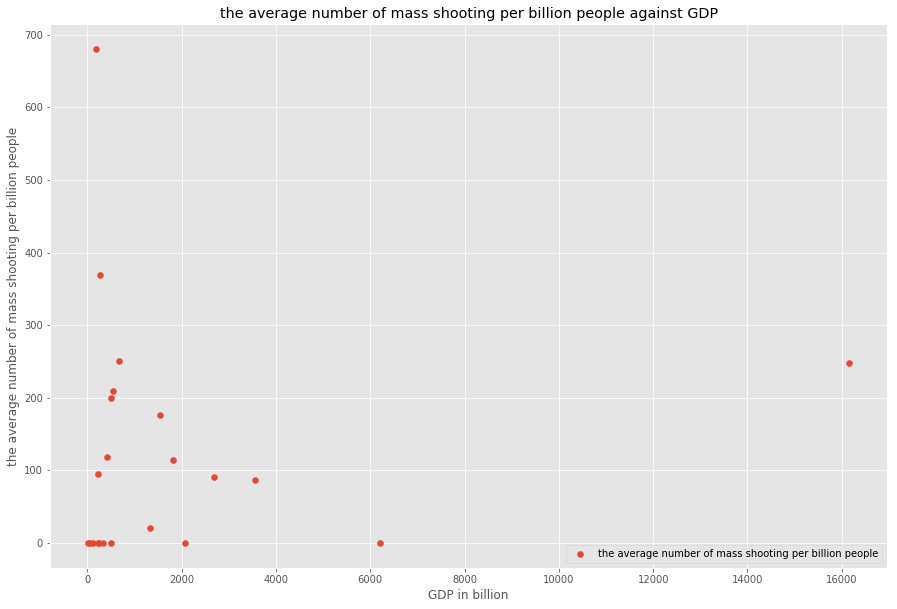

In [217]:
pl.figure(figsize = [15,10])
pl.scatter(df_.gdp / 1e9,df_['Number of mass shootings'] / df_['pop'] * 1e9,label='the average number of mass shooting per billion people')
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'] / df_['pop'] * 1e9, 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0)/df_['pop'] * 1e9, fmt = '.')
pl.xlabel('GDP in billion')
pl.ylabel('the average number of mass shooting per billion people')
pl.legend(loc='lower right')
pl.title('the average number of mass shooting per billion people against GDP')
pl.show()

## Figure 2. mass shooting per billion people vs gdp. The datapoint to the middle right of the plot is the USA, which has noth the highest GDP and the datapoint to the upper left of the plot is New Zealand, which has the highest number of mass shooting per person

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

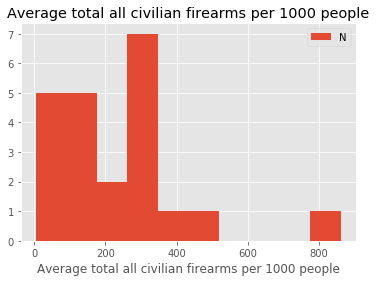

In [218]:
fig, ax = plt.subplots()
ax.hist(df_['Average total all civilian firearms'] / df_['pop'] * 1000,label='N')
ax.set_xlabel('Average total all civilian firearms per 1000 people')
ax.set_title('Average total all civilian firearms per 1000 people')
ax.legend()

## Figure 3. histogram of average total all civilian firearms per 1000 people. The datapoint to the right of the plot is USA, which has the highest civilian firearms per 1000 people

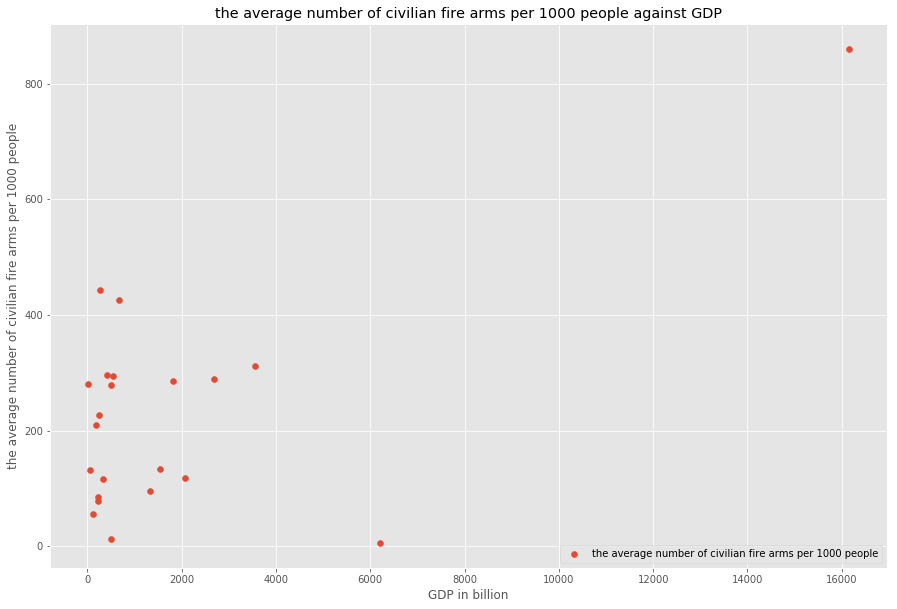

In [219]:
pl.figure(figsize = [15,10])
pl.scatter(df_.gdp / 1e9,df_['Average total all civilian firearms'] / df_['pop'] * 1000,label='the average number of civilian fire arms per 1000 people')

pl.xlabel('GDP in billion')
pl.ylabel('the average number of civilian fire arms per 1000 people')
pl.legend(loc='lower right')
pl.title('the average number of civilian fire arms per 1000 people against GDP')
pl.show()

## Figure 4. the average number of civilian fire arms per person without errors. The datapoint to the top right of the plot is the USA, which has the highest GDP and the highest number of civilian fire arms per 1000 people

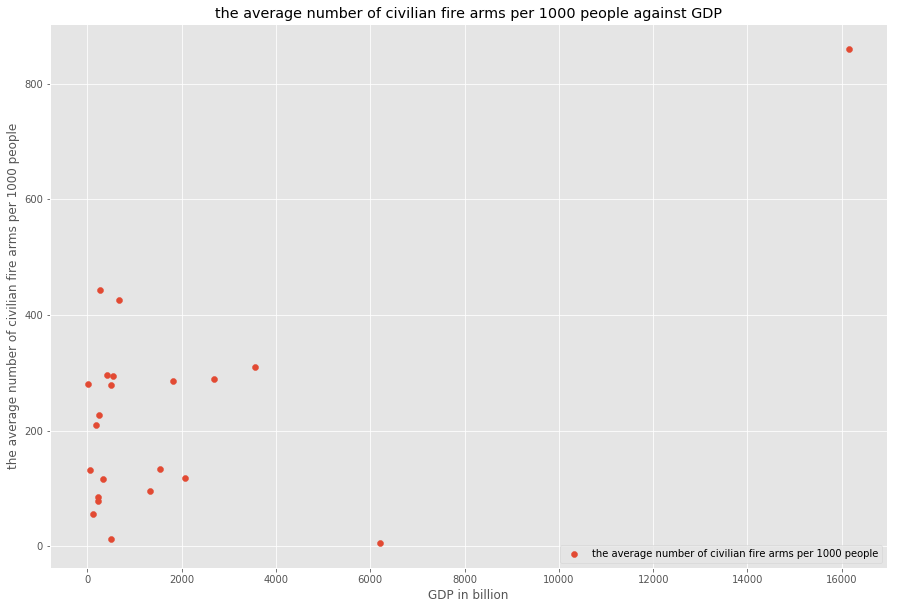

In [220]:
pl.figure(figsize = [15,10])
pl.scatter(df_.gdp / 1e9,df_['Average total all civilian firearms'] / df_['pop'] * 1000,label='the average number of civilian fire arms per 1000 people')
pl.errorbar(df_.gdp / 1e9,df_['Average total all civilian firearms'] / df_['pop'] * 1000, yerr = np.sqrt(df_['Average total all civilian firearms']* 1.0) / df_['pop'] * 1000 , fmt = '.')
pl.xlabel('GDP in billion')
pl.ylabel('the average number of civilian fire arms per 1000 people')
pl.legend(loc='lower right')
pl.title('the average number of civilian fire arms per 1000 people against GDP')
pl.show()

## Figure 5. the average number of civilian fire arms per 1000 people with errors. The datapoint to the top right of the plot is the USA, which has the highest GDP and the highest number of civilian fire arms per 1000 people

In [221]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e3

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

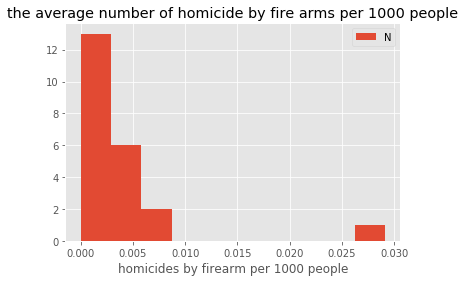

In [222]:
fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000,label='N')
ax.set_xlabel('homicides by firearm per 1000 people')
ax.set_title('the average number of homicide by fire arms per 1000 people')
ax.legend()

## Figure 6. histogram of the average number of homicide by fire arms per 1000 people. The datapoint to the right of the plot is the USA, which has the highest homicides by firearm per 1000 people

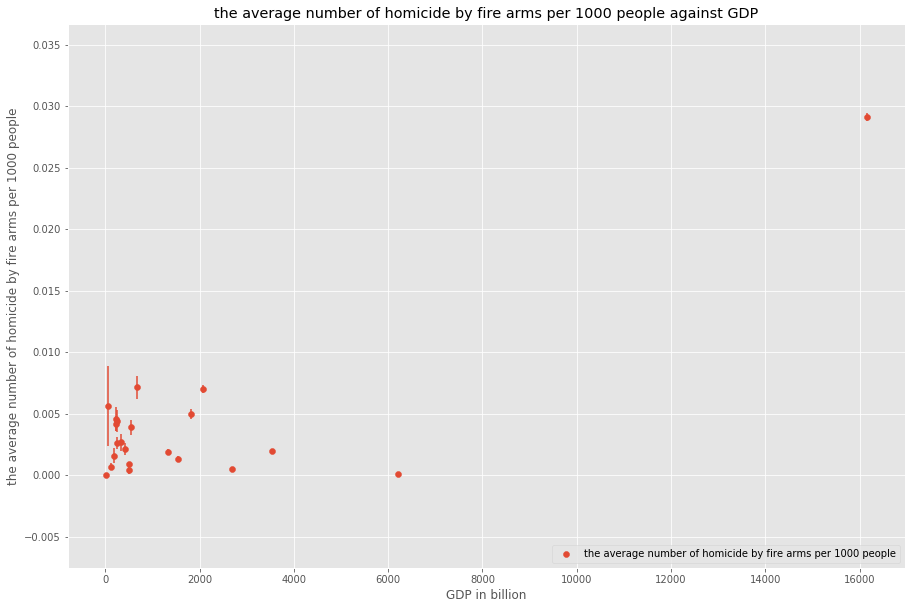

In [223]:
pl.figure(figsize = [15,10])
pl.scatter(df_.gdp / 1e9,df_['Number of homicides by firearm'] / df_['pop'] * 1000,label='the average number of homicide by fire arms per 1000 people')
pl.errorbar(df_.gdp / 1e9,df_['Number of homicides by firearm'] / df_['pop'] * 1000, yerr = np.sqrt(df_['Number of homicides by firearm']* 1.0)/df_['pop'] * 1000, fmt = '.')
pl.xlabel('GDP in billion')
pl.ylabel('the average number of homicide by fire arms per 1000 people')
pl.legend(loc='lower right')
pl.title('the average number of homicide by fire arms per 1000 people against GDP')
pl.show()

## Figure 7. the average number of homicide by fire arms per 1000 people with errors. The datapoint to the top right of the plot is the USA, which has the highest GDP and the highest number of homicide by fire arms per 1000 people

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


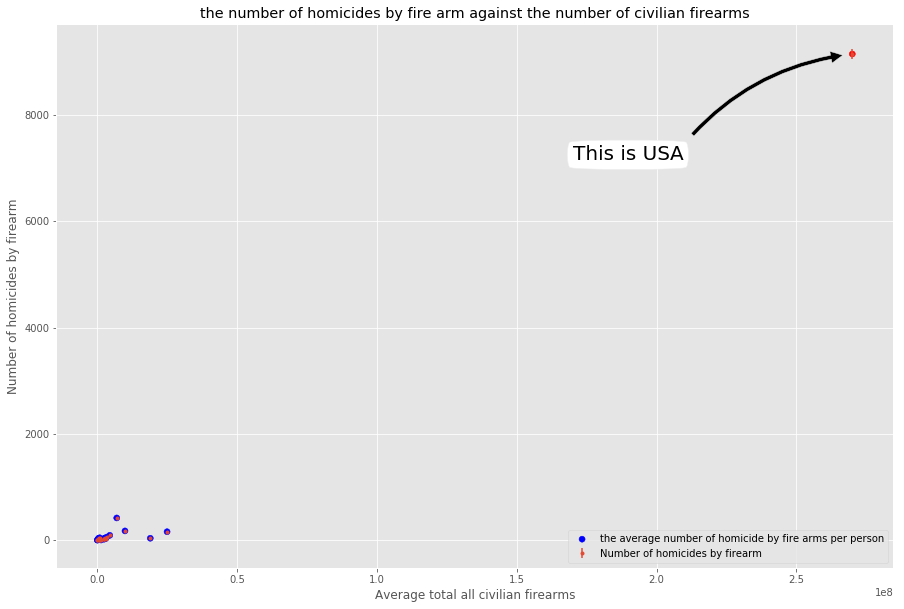

In [224]:
pl.figure(figsize = [15,10])
pl.errorbar(df_['Average total all civilian firearms'],df_['Number of homicides by firearm'] , yerr = np.sqrt(df_['Number of homicides by firearm']* 1.0), fmt = '.')
pl.scatter(df_['Average total all civilian firearms'],df_['Number of homicides by firearm'] ,label='the average number of homicide by fire arms per person',c=['b']*(len(df_.index)-1)+['r'])
pl.annotate('This is USA', xy=df_.sort_values(by='gdp',ascending=False).iloc[0,1:3], 
            xytext=(df_.sort_values(by='gdp',ascending=False).iloc[0,1:3][0]-1*1e8, df_.sort_values(by='gdp',ascending=False).iloc[0,1:3][1]-2000),
            bbox=dict(boxstyle="round4", fc="w"),arrowprops=dict(facecolor='black', shrink=0.05,connectionstyle="arc3,rad=-0.2"),size=20
            )
pl.xlabel('Average total all civilian firearms')
pl.ylabel('Number of homicides by firearm')
pl.legend(loc='lower right')
pl.title('the number of homicides by fire arm against the number of civilian firearms')
pl.show()

## Figure 8. the number of homicides by fire arm against the number of civilian firearms with errors. The datapoint to the top right of the plot is the USA, which has the highest GDP and the highest number of homicide by fire arms

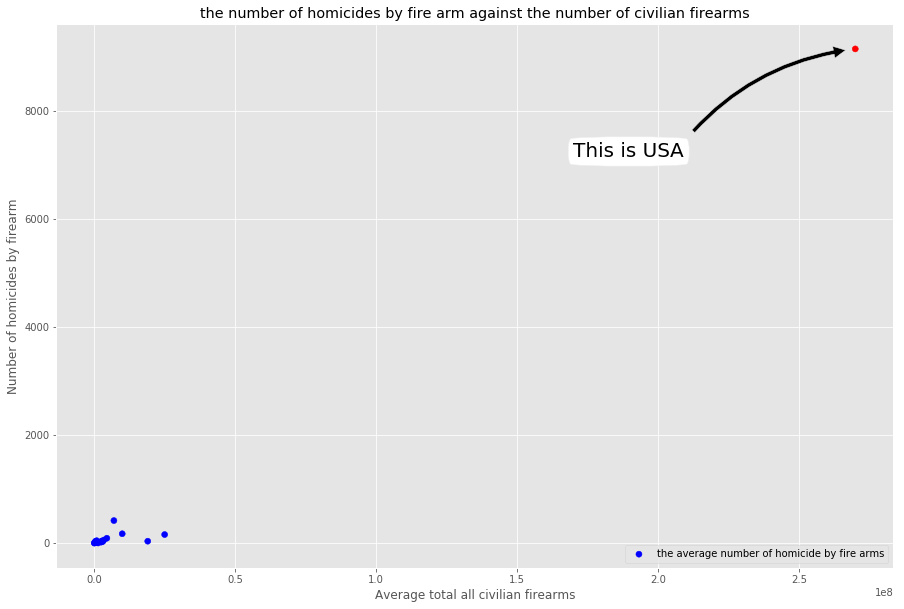

In [225]:
pl.figure(figsize = [15,10])
pl.scatter(df_['Average total all civilian firearms'],df_['Number of homicides by firearm'] ,label='the average number of homicide by fire arms',c=['b']*(len(df_.index)-1)+['r'])
pl.annotate('This is USA', xy=df_.sort_values(by='gdp',ascending=False).iloc[0,1:3], 
            xytext=(df_.sort_values(by='gdp',ascending=False).iloc[0,1:3][0]-1*1e8, df_.sort_values(by='gdp',ascending=False).iloc[0,1:3][1]-2000),
            bbox=dict(boxstyle="round4", fc="w"),arrowprops=dict(facecolor='black', shrink=0.05,connectionstyle="arc3,rad=-0.2"),size=20
            )
pl.xlabel('Average total all civilian firearms')
pl.ylabel('Number of homicides by firearm')
pl.legend(loc='lower right')
pl.title('the number of homicides by fire arm against the number of civilian firearms')
pl.show()

## Figure 9. the number of homicides by fire arm against the number of civilian firearms without errors. The datapoint to the top right of the plot is the USA, which has the highest GDP and the highest number of homicide by fire arms

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


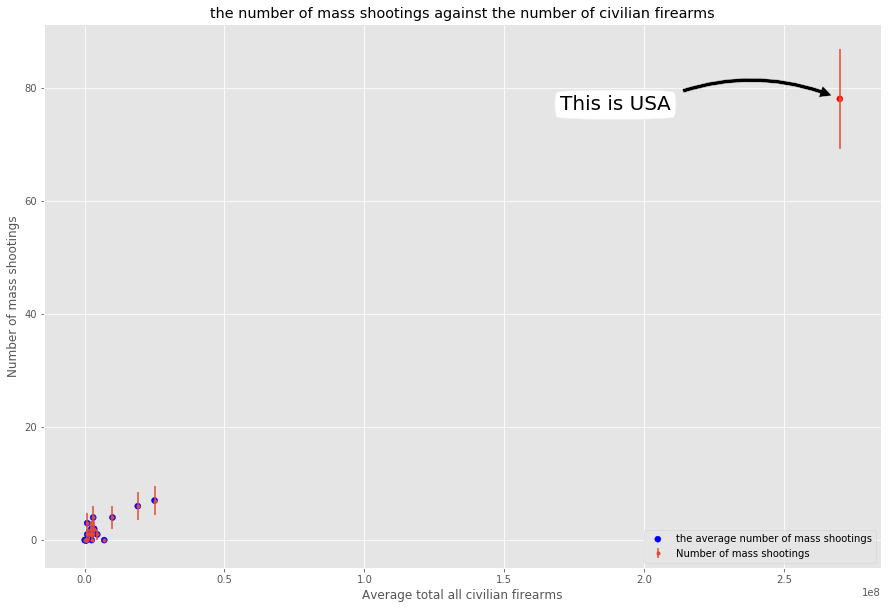

In [226]:
pl.figure(figsize = [15,10])
pl.errorbar(df_['Average total all civilian firearms'],df_['Number of mass shootings'] , yerr = np.sqrt(df_['Number of mass shootings']* 1.0), fmt = '.')
pl.scatter(df_['Average total all civilian firearms'],df_['Number of mass shootings'] ,label='the average number of mass shootings',c=['b']*(len(df_.index)-1)+['r'])
pl.annotate('This is USA', xy=df_.sort_values(by='gdp',ascending=False).iloc[0,[1,6]], 
            xytext=(df_.sort_values(by='gdp',ascending=False).iloc[0,[1,6]][0]-1*1e8, df_.sort_values(by='gdp',ascending=False).iloc[0,[1,6]][1]-2),
            bbox=dict(boxstyle="round4", fc="w"),arrowprops=dict(facecolor='black', shrink=0.05,connectionstyle="arc3,rad=-0.2"),size=20
            )
pl.xlabel('Average total all civilian firearms')
pl.ylabel('Number of mass shootings')
pl.legend(loc='lower right')
pl.title('the number of mass shootings against the number of civilian firearms')
pl.show()

## Figure 10. the number of mass shootings against the number of civilian firearms with errors. The datapoint to the top right of the plot is the USA, which has the highest GDP and the highest number of mass shootings

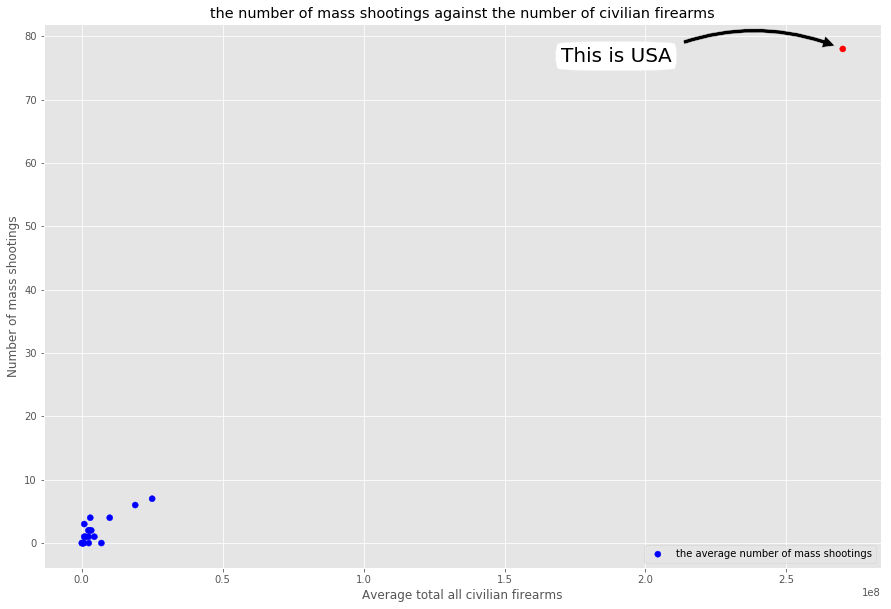

In [227]:
pl.figure(figsize = [15,10])
pl.scatter(df_['Average total all civilian firearms'],df_['Number of mass shootings'] ,label='the average number of mass shootings',c=['b']*(len(df_.index)-1)+['r'])
pl.annotate('This is USA', xy=df_.sort_values(by='gdp',ascending=False).iloc[0,[1,6]], 
            xytext=(df_.sort_values(by='gdp',ascending=False).iloc[0,[1,6]][0]-1*1e8, df_.sort_values(by='gdp',ascending=False).iloc[0,[1,6]][1]-2),
            bbox=dict(boxstyle="round4", fc="w"),arrowprops=dict(facecolor='black', shrink=0.05,connectionstyle="arc3,rad=-0.2"),size=20
            )
pl.xlabel('Average total all civilian firearms')
pl.ylabel('Number of mass shootings')
pl.legend(loc='lower right')
pl.title('the number of mass shootings against the number of civilian firearms')
pl.show()

## Figure 11. the number of mass shootings against the number of civilian firearms without errors. The datapoint to the top right of the plot is the USA, which has the highest GDP and the highest number of mass shootings

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [349]:
df_fit = pd.DataFrame({'x':(df_['Average total all civilian firearms']/df_['pop'])*10,'y':(df_['Number of mass shootings']/df_['pop'])*1e7})

In [348]:
np.mean(df_['Number of mass shootings']/df_['pop'])

1.2102125439686046e-07

In [343]:
np.mean(df_['Average total all civilian firearms']/df_['pop'])

0.22895008572891778

In [350]:
ols = smf.ols(formula='y~x',data=df_fit).fit()

In [404]:
weights = 1.0/(np.sqrt(df_fit.y)/df_['pop']*1e7)
# here when the numerator is 0, I replace weight inf with 1 cuz when the yerror is 0 it means that we should not weigh y any differently
weights = weights.replace(np.inf,1)

In [405]:
wls = smf.wls(formula='y~x',data=df_fit,weights=weights**2).fit()

In [406]:
wls.predict()-ols.predict()

array([-0.45040982, -0.61582586, -0.60539984, -0.43212485, -0.7653196 ,
       -0.60850098, -0.63037942, -0.54429322, -0.37120475, -0.59958835,
       -0.39365355, -0.43347189, -0.3193623 , -0.44801155, -0.5274776 ,
       -0.59789885, -0.32734528, -0.40089594, -0.41171132, -0.6133571 ,
       -0.74684831, -1.18972449])

In [407]:
polyfit = np.polyfit(df_fit.x, df_fit.y, 1)
f = np.poly1d(polyfit)

x_new = np.linspace(df_fit.x.min(), df_fit.x.max(), 10000)
y_new = f(x_new)

In [408]:
wls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            WLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     915.0
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           3.57e-18
Time:                        15:05:33   Log-Likelihood:                -19.163
No. Observations:                  22   AIC:                             42.33
Df Residuals:                      20   BIC:                             44.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0012      0.066      0.018      0.986      -0.136       0.139
x              0.2892      0.010     30.249      0.000       0.269       0.309
==============================================================================
Omnibus:                        7.534   Durbin-Watson:                   1.456
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                5.129
Skew:                           1.022   Prob(JB):                       0.0770
Kurtosis:                       4.191   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [409]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     4.971
Date:                Tue, 17 Oct 2017   Prob (F-statistic):             0.0374
Time:                        15:05:43   Log-Likelihood:                -39.232
No. Observations:                  22   AIC:                             82.46
Df Residuals:                      20   BIC:                             84.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3149      0.515      0.612      0.548      -0.759       1.388
x              0.3911      0.175      2.230      0.037       0.025       0.757
==============================================================================
Omnibus:                       34.840   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.018
Skew:                           2.733   Prob(JB):                     7.71e-20
Kurtosis:                      11.133   Cond. No.                         5.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

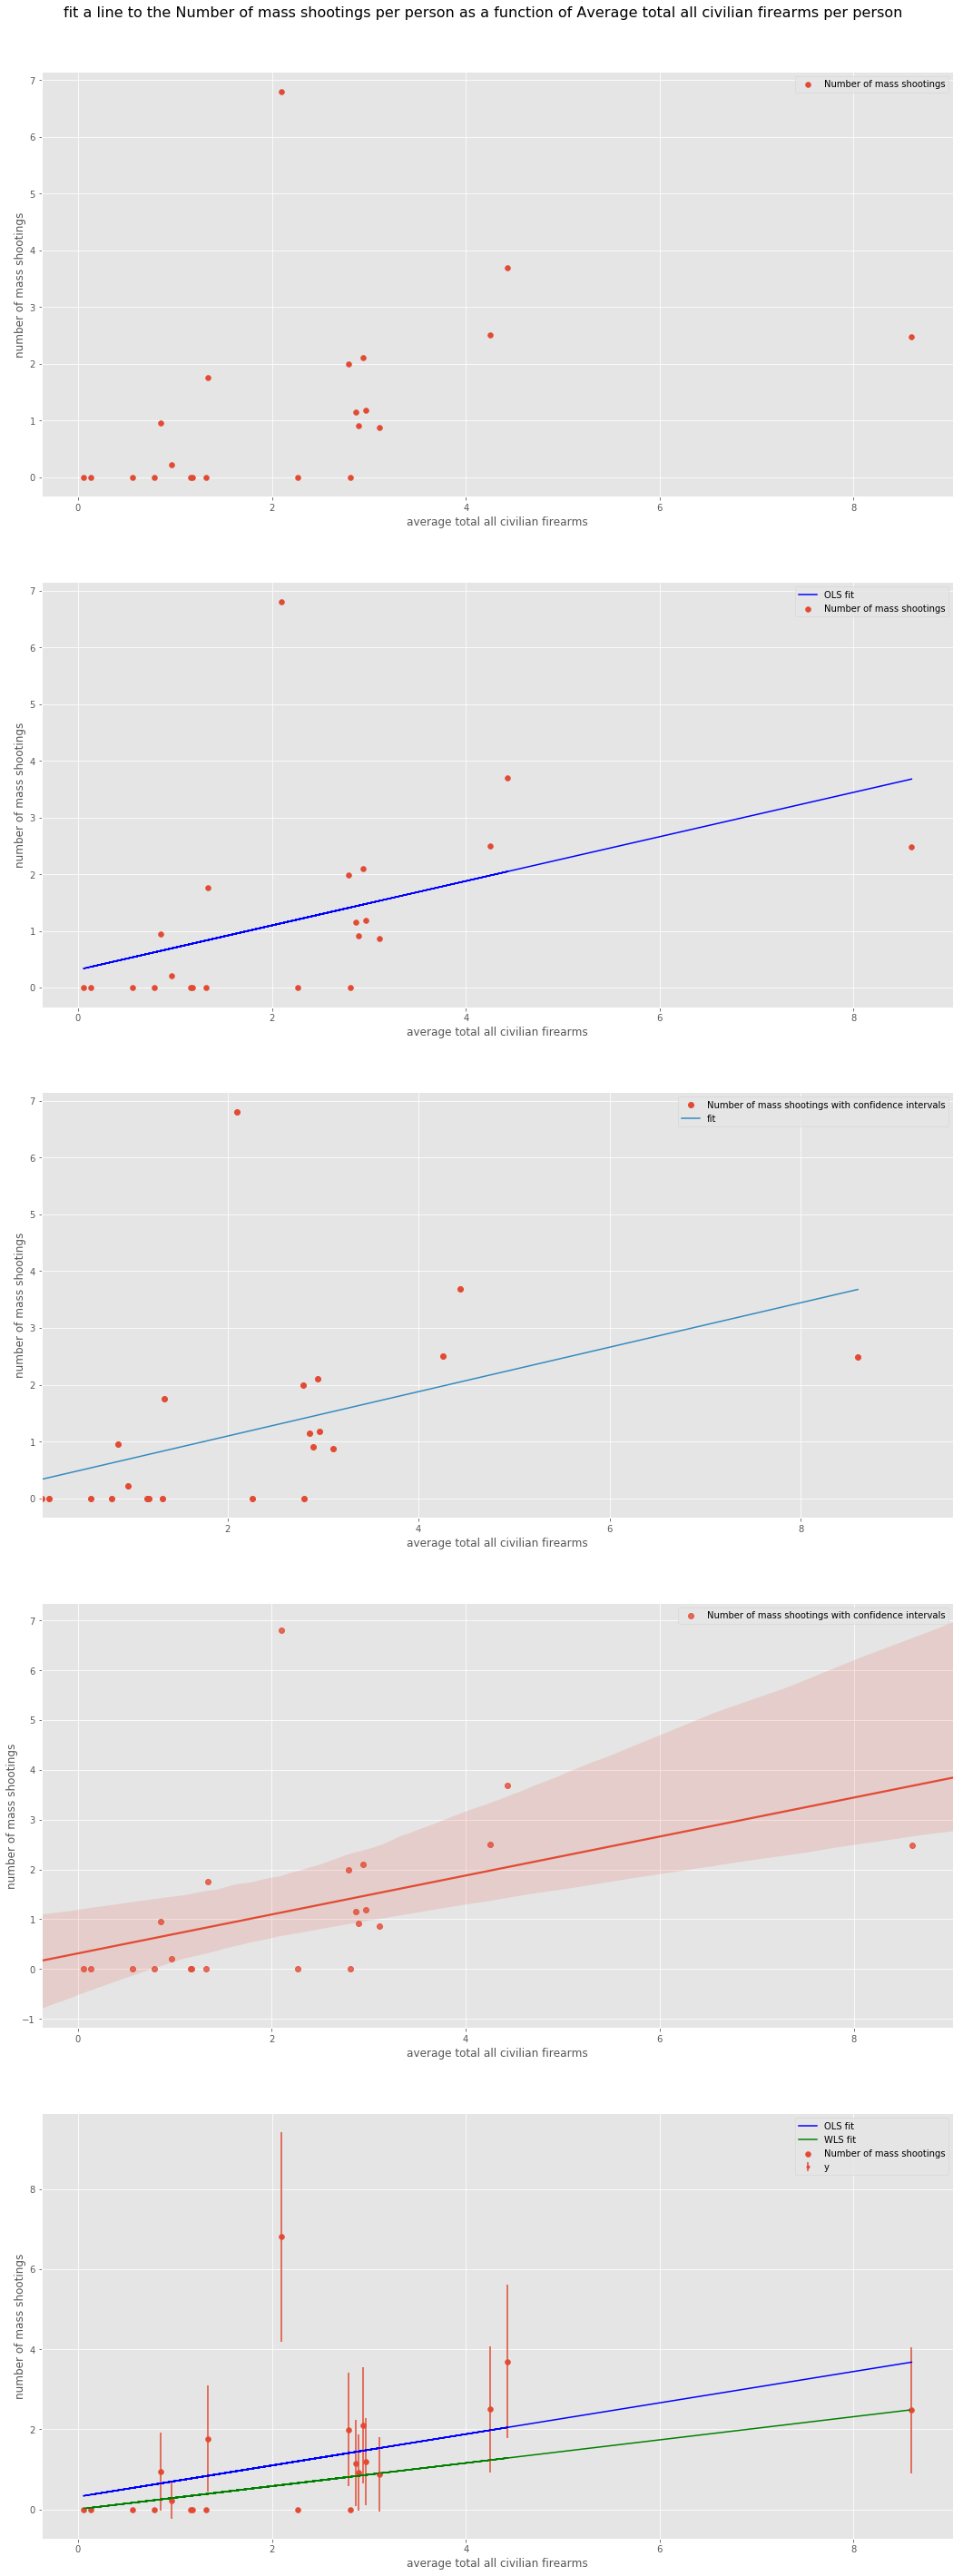

In [420]:
fig = pl.figure(figsize=[18,50])
ax1 = fig.add_subplot(511)
ax1.scatter(df_fit.x,df_fit.y,label='Number of mass shootings')
ax1.set_xlabel('average total all civilian firearms')
ax1.set_ylabel('number of mass shootings')
ax1.legend()

ax2 = fig.add_subplot(512)
ax2.scatter(df_fit.x,df_fit.y,label='Number of mass shootings')
ax2.plot(df_fit.x,ols.predict(),label='OLS fit',c='b')
ax2.set_xlabel('average total all civilian firearms')
ax2.set_ylabel('number of mass shootings')
ax2.legend()

ax3 = fig.add_subplot(513)
ax3.plot(df_fit.x,df_fit.y,'o',label='Number of mass shootings with confidence intervals')
ax3.plot(x_new,y_new,label='fit')
ax3.set_xlim([df_fit.x.min(), df_fit.x.max() + 1 ])
ax3.set_xlabel('average total all civilian firearms')
ax3.set_ylabel('number of mass shootings')
ax3.legend()

ax4 = fig.add_subplot(514)
sns.regplot(x='x',y='y',data=df_fit,label='Number of mass shootings with confidence intervals',ax=ax4)
ax4.set_xlabel('average total all civilian firearms')
ax4.set_ylabel('number of mass shootings')
ax4.legend()

ax5 = fig.add_subplot(515)
ax5.scatter(df_fit.x,df_fit.y,label='Number of mass shootings')
ax5.plot(df_fit.x,ols.predict(),label='OLS fit',c='b')
ax5.errorbar(df_fit.x,df_fit.y , yerr = np.sqrt(df_fit.y* 1.0), fmt = '.')
ax5.plot(df_fit.x,wls.predict(),label='WLS fit',c='g')
ax5.set_xlabel('average total all civilian firearms')
ax5.set_ylabel('number of mass shootings')
ax5.legend()

fig.suptitle('fit a line to the Number of mass shootings per person as a function of Average total all civilian firearms per person',y=0.90,fontsize=16)

## Figure 12. fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



In [366]:
tp = scipy.stats.t.ppf(0.975, len(df_fit.index)-2)
tp

2.0859634472658364

In [368]:
sigma = np.sqrt(np.sum((df_fit.y-wls.predict())**2)/len(df_fit.index))
sigma

1.5474287344160034

In [370]:
n = len(df_fit.index)
a = wls.params[0]
b = wls.params[1]

In [390]:
b1 = b - tp * (np.sqrt(n)*sigma/(np.sqrt(n-2)*np.sqrt(np.sum((df_fit.x-np.mean(df_fit.x))**2))))
b2 = b + tp * (np.sqrt(n)*sigma/(np.sqrt(n-2)*np.sqrt(np.sum((df_fit.x-np.mean(df_fit.x))**2))))

In [391]:
a1 = a - tp * np.sqrt(sigma**2/(n-2))
a2 = a + tp * np.sqrt(sigma**2/(n-2))

In [392]:
y1 = b1 * df_fit.x + a1
y2 = b2 * df_fit.x + a2

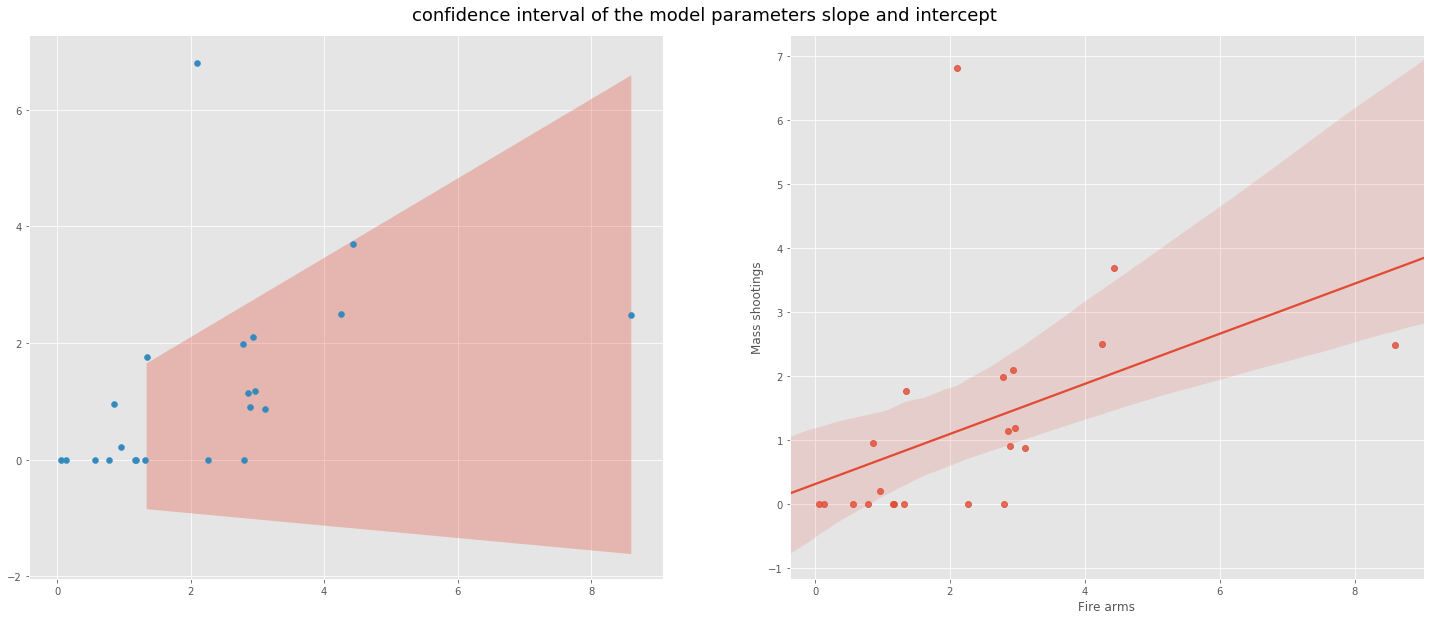

In [423]:
fig = pl.figure(figsize = (25,10))
ax1 = fig.add_subplot(121)
ax1.fill_between(df_fit.x,y1,y2,alpha=0.3)
ax1.scatter(df_fit.x,df_fit.y)

ax2 = fig.add_subplot(122)
sns.regplot(x="x", y="y", data=df_fit,ax = ax2);
ax2.set_ylabel("Mass shootings")
ax2.set_xlabel("Fire arms");

fig.suptitle('confidence interval of the model parameters slope and intercept',y = 0.92, fontsize = 18)

## Figure 13. confidence interval of the model parameters slope and intercept

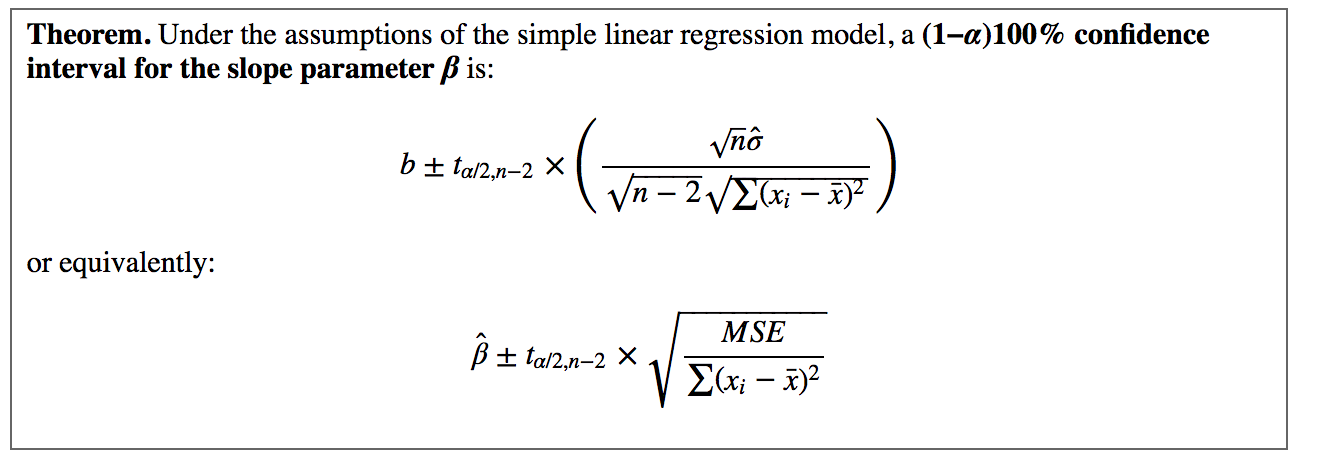

In [231]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

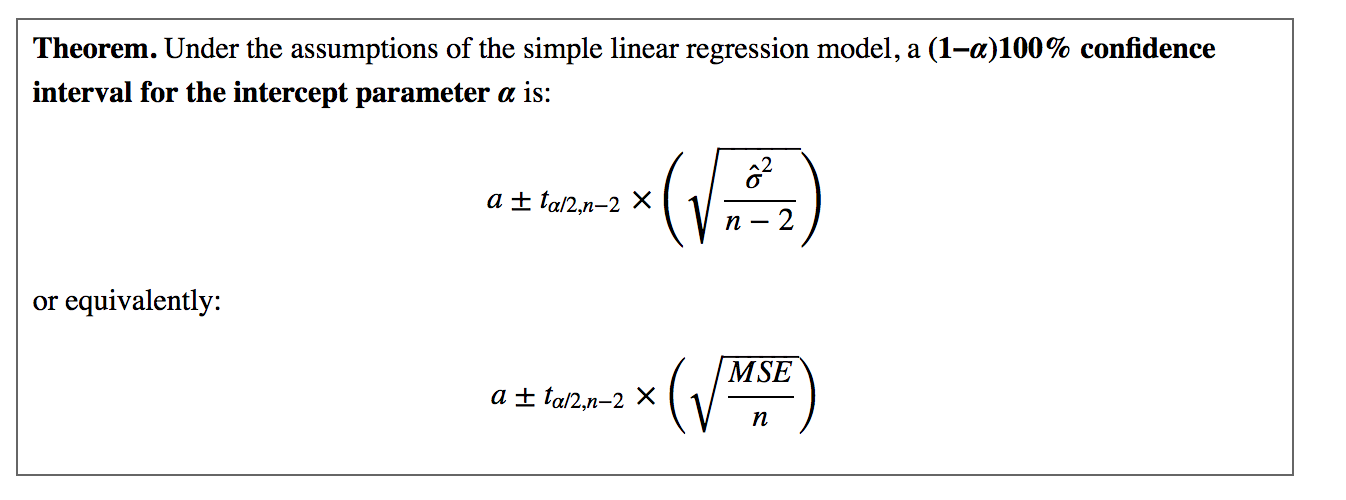

In [232]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

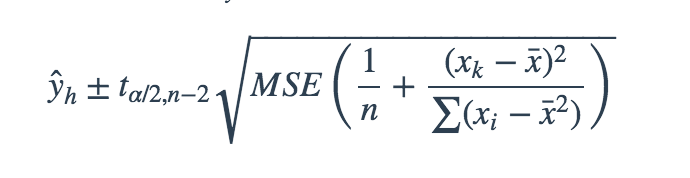

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

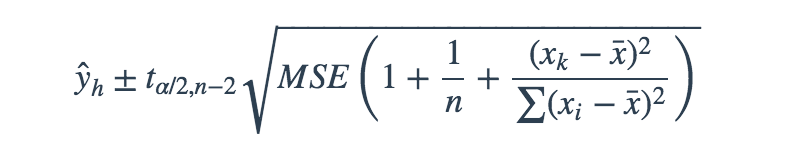

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

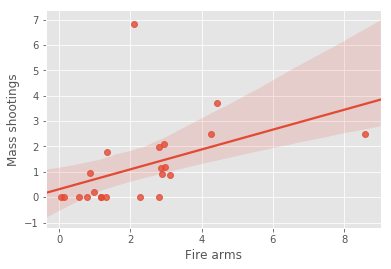

In [363]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_fit);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

In [431]:
sm.graphics.

AttributeError: 'module' object has no attribute 'influence_plot'

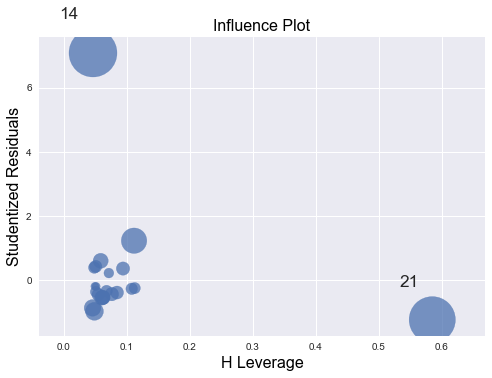

In [362]:
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings